In [1]:
# Packages to import
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
from datetime import datetime
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [4]:
# Ensure GPU Usage
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
cd ~

/home/ssakthiv


In [6]:
files = pd.read_csv('private/all_filepaths.csv')
files_proper = files.apply(lambda x: x['path'][14:], axis = 1)
files['path'] = files_proper
files

,dicom_id,path,Edema,Pleural Effusion
0,6ad03ed1-97ee17ee-9cf8b320-f7011003-cd93b42d,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0,0.0
1,5aa15ba6-55f5e96e-39cea686-7c3b28b2-b8c97a88,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0,1.0
2,54affd39-8bf24209-232bac8a-df6c277a-398ee8a5,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0,1.0
3,0009a9fb-eb905e90-824cad7c-16d40468-007f0038,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0,0.0
4,7b25b3ed-e780a527-319cb7b3-02d5d071-f1cddee9,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0,1.0
...,...,...,...,...
33698,a29987d8-abd13298-7a067b12-620f9fdb-103ecf53,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0,1.0
33699,90cc8b7a-b89b1a56-6e5b0c04-409b50c7-30092d26,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0,0.0
33700,518011e2-346dbd44-3e738335-c5006bf8-d69f6b68,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0,0.0
33701,1427ad57-5bf4f3e6-90be02f3-d1760987-99d7f2ce,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0,1.0


In [7]:
overall_data = files[['path', 'Edema']]
overall_data

,path,Edema
0,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0
1,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0
2,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0
3,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0
4,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0
...,...,...
33698,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0
33699,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,1.0
33700,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0
33701,teams/dsc-180a---a14-[88137]/MIMIC_Images/trai...,0.0


In [8]:
overall_data['Edema'] = overall_data['Edema'].astype(str)

/tmp/ipykernel_96/1252016034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_data['Edema'] = overall_data['Edema'].astype(str)


In [9]:
train_data, test_data = train_test_split(overall_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

In [10]:
# Define the ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
# Use flow_from_dataframe method to create the generator
train_images = train_gen.flow_from_dataframe(
    dataframe=train_data,
    directory=None,
    x_col="path",
    y_col="Edema",
    target_size=(512, 512),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

val_images = val_gen.flow_from_dataframe(
    dataframe=val_data,
    directory=None,
    x_col="path",
    y_col="Edema",
    target_size=(512, 512),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)
test_images = val_gen.flow_from_dataframe(
    dataframe=test_data,
    directory=None,
    x_col="path",
    y_col="Edema",
    target_size=(512, 512),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 26962 validated image filenames belonging to 2 classes.
Found 3370 validated image filenames belonging to 2 classes.
Found 3371 validated image filenames belonging to 2 classes.


In [18]:
resnet = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(512, 512, 3),
    pooling = "avg",
    classifier_activation = 'softmax'
)

In [19]:
# Freezing the pre-trained weights
for layer in resnet.layers:
    layer.trainable = False

In [20]:
resnet.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 258, 258, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [21]:
x = resnet.output
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [22]:
model = Model(inputs=resnet.input, outputs=outputs)

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10


2023-03-02 05:04:22.781025: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2023-03-02 05:04:23.577277: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-02 05:04:23.578786: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-02 05:04:23.578883: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2023-03-02 05:04:23.579867: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-02 05:04:23.580093: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


843/843 [==============================] - 737s 861ms/step - loss: 0.5699 - accuracy: 0.7064 - val_loss: 0.5467 - val_accuracy: 0.7294
Epoch 2/10
843/843 [==============================] - 640s 759ms/step - loss: 0.5186 - accuracy: 0.7480 - val_loss: 0.5188 - val_accuracy: 0.7507
Epoch 3/10
843/843 [==============================] - 610s 723ms/step - loss: 0.4994 - accuracy: 0.7605 - val_loss: 0.5065 - val_accuracy: 0.7579
Epoch 4/10
843/843 [==============================] - 625s 740ms/step - loss: 0.4874 - accuracy: 0.7687 - val_loss: 0.4983 - val_accuracy: 0.7620
Epoch 5/10
843/843 [==============================] - 613s 727ms/step - loss: 0.4785 - accuracy: 0.7752 - val_loss: 0.4942 - val_accuracy: 0.7662
Epoch 6/10
843/843 [==============================] - 649s 769ms/step - loss: 0.4719 - accuracy: 0.7787 - val_loss: 0.4896 - val_accuracy: 0.7647
Epoch 7/10
843/843 [==============================] - 660s 782ms/step - loss: 0.4668 - accuracy: 0.7830 - val_loss: 0.4840 - val_accura

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
all_acc = acc
val_all_acc = val_acc

all_loss = loss
val_all_loss = val_loss

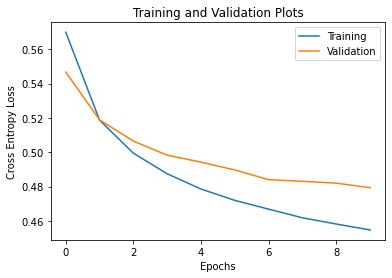

In [26]:
plt.plot(np.arange(len(all_loss)), all_loss, label='Training')
plt.plot(np.arange(len(val_all_loss)), val_all_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title("Training and Validation Plots")
plt.legend()

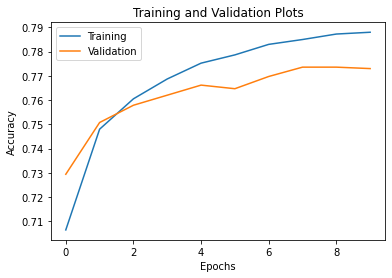

In [27]:
plt.plot(np.arange(len(all_acc)), all_acc, label='Training')
plt.plot(np.arange(len(val_all_acc)), val_all_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Plots")
plt.legend()

In [29]:
predictions = model.predict(test_images)
predicted_classes = np.where(predictions < 0.5, 0, 1)
true_classes = np.array(test_images.labels)
ce_loss = model.evaluate(test_images, verbose=1)
ce_loss

106/106 [==============================] - 82s 764ms/step - loss: 0.4829 - accuracy: 0.7680


[0.48294439911842346, 0.7680213451385498]

In [32]:
predicted_classes = np.where(predictions < 0.5, 0, 1)
predicted_classes

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

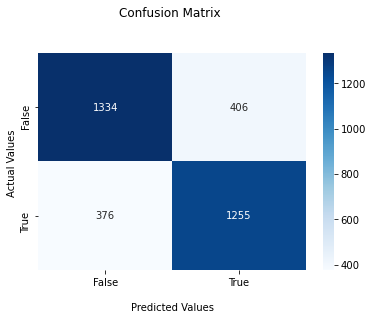

In [33]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(true_classes, predicted_classes)

import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

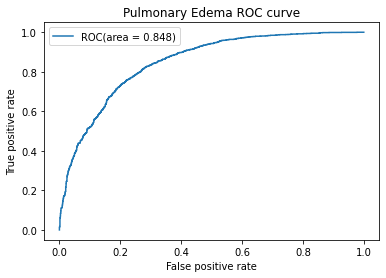

In [35]:
fpr, tpr, threshold = roc_curve(true_classes, predictions, drop_intermediate = False)
roc_auc = roc_auc_score(true_classes, predictions)

plt.figure(1)
plt.plot(fpr, tpr, label ='ROC(area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Pulmonary Edema ROC curve')
plt.legend(loc = 'best')
plt.show()

In [36]:
model.save('Models/model_edema_linear')

2023-03-02 06:58:29.144168: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Models/model_edema_linear/assets


/home/ssakthiv/.local/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [37]:
# Un-freezing some layers - 5, 3
for layer in model.layers[551:]:
    layer.trainable = True

In [38]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
843/843 [==============================] - 730s 855ms/step - loss: 0.4660 - accuracy: 0.7814 - val_loss: 0.4676 - val_accuracy: 0.7801
Epoch 2/10
843/843 [==============================] - 680s 806ms/step - loss: 0.4029 - accuracy: 0.8188 - val_loss: 0.4468 - val_accuracy: 0.7914
Epoch 3/10
843/843 [==============================] - 670s 794ms/step - loss: 0.3531 - accuracy: 0.8480 - val_loss: 0.4511 - val_accuracy: 0.7869
Epoch 4/10
843/843 [==============================] - 667s 791ms/step - loss: 0.3024 - accuracy: 0.8784 - val_loss: 0.4442 - val_accuracy: 0.7961
Epoch 5/10
843/843 [==============================] - 658s 779ms/step - loss: 0.2448 - accuracy: 0.9108 - val_loss: 0.4775 - val_accuracy: 0.7828
Epoch 6/10
843/843 [==============================] - 631s 748ms/step - loss: 0.1902 - accuracy: 0.9389 - val_loss: 0.5193 - val_accuracy: 0.7706
Epoch 7/10
843/843 [==============================] - 640s 759ms/step - loss: 0.1389 - accuracy: 0.9641 - val_loss: 0.5217 -

In [39]:
all_acc += history.history['accuracy']
val_all_acc += history.history['val_accuracy']

all_loss += history.history['loss']
val_all_loss += history.history['val_loss']

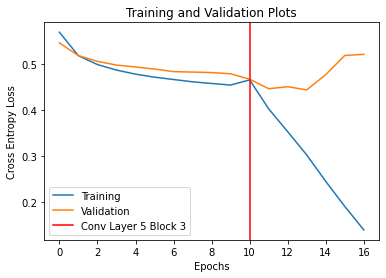

In [40]:
plt.plot(np.arange(len(all_loss)), all_loss, label='Training')
plt.plot(np.arange(len(val_all_loss)), val_all_loss, label='Validation')
plt.axvline(x = 10, color = 'r', label = 'Conv Layer 5 Block 3')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title("Training and Validation Plots")
plt.legend()

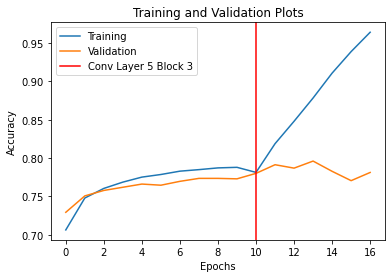

In [41]:
plt.plot(np.arange(len(all_acc)), all_acc, label='Training')
plt.plot(np.arange(len(val_all_acc)), val_all_acc, label='Validation')
plt.axvline(x = 10, color = 'r', label = 'Conv Layer 5 Block 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Plots")
plt.legend()

In [42]:
predictions = model.predict(test_images)
predicted_classes = np.where(predictions < 0.5, 0, 1)
true_classes = np.array(test_images.labels)
ce_loss = model.evaluate(test_images, verbose=1)
ce_loss

106/106 [==============================] - 69s 642ms/step - loss: 0.4454 - accuracy: 0.7947


[0.4454101324081421, 0.7947196960449219]

In [44]:
predicted_classes = np.where(predictions < 0.5, 0, 1)

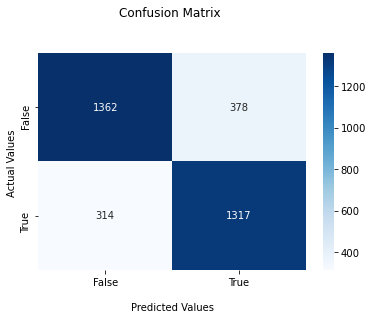

In [45]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(true_classes, predicted_classes)

import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

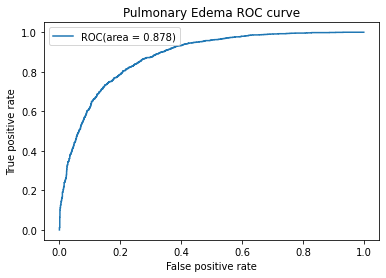

In [46]:
fpr, tpr, threshold = roc_curve(true_classes, predictions, drop_intermediate = False)
roc_auc = roc_auc_score(true_classes, predictions)

plt.figure(1)
plt.plot(fpr, tpr, label ='ROC(area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Pulmonary Edema ROC curve')
plt.legend(loc = 'best')
plt.show()

In [47]:
model.save('Models/model_edema_53')

INFO:tensorflow:Assets written to: Models/model_edema_53/assets


/home/ssakthiv/.local/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [48]:
for layer in model.layers[540:]:
    layer.trainable = True

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
843/843 [==============================] - 687s 801ms/step - loss: 0.3525 - accuracy: 0.8449 - val_loss: 0.5137 - val_accuracy: 0.7656
Epoch 2/10
843/843 [==============================] - 672s 796ms/step - loss: 0.2178 - accuracy: 0.9249 - val_loss: 0.4764 - val_accuracy: 0.7926
Epoch 3/10
843/843 [==============================] - 792s 939ms/step - loss: 0.1115 - accuracy: 0.9752 - val_loss: 0.5466 - val_accuracy: 0.7843
Epoch 4/10
843/843 [==============================] - 781s 926ms/step - loss: 0.0454 - accuracy: 0.9950 - val_loss: 0.6540 - val_accuracy: 0.7807
Epoch 5/10
843/843 [==============================] - 644s 763ms/step - loss: 0.0186 - accuracy: 0.9990 - val_loss: 0.7397 - val_accuracy: 0.7813


In [50]:
all_acc += history.history['accuracy']
val_all_acc += history.history['val_accuracy']

all_loss += history.history['loss']
val_all_loss += history.history['val_loss']

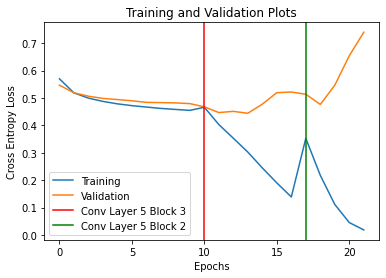

In [51]:
plt.plot(np.arange(len(all_loss)), all_loss, label='Training')
plt.plot(np.arange(len(val_all_loss)), val_all_loss, label='Validation')
plt.axvline(x = 10, color = 'r', label = 'Conv Layer 5 Block 3')
plt.axvline(x = 17, color = 'g', label = 'Conv Layer 5 Block 2')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title("Training and Validation Plots")
plt.legend()

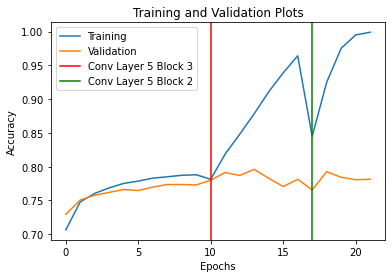

In [52]:
plt.plot(np.arange(len(all_acc)), all_acc, label='Training')
plt.plot(np.arange(len(val_all_acc)), val_all_acc, label='Validation')
plt.axvline(x = 10, color = 'r', label = 'Conv Layer 5 Block 3')
plt.axvline(x = 17, color = 'g', label = 'Conv Layer 5 Block 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Plots")
plt.legend()

In [53]:
predictions = model.predict(test_images)
predicted_classes = np.where(predictions < 0.5, 0, 1)
true_classes = np.array(test_images.labels)
ce_loss = model.evaluate(test_images, verbose=1)
ce_loss

106/106 [==============================] - 74s 692ms/step - loss: 0.4741 - accuracy: 0.7941


[0.47412797808647156, 0.7941263914108276]

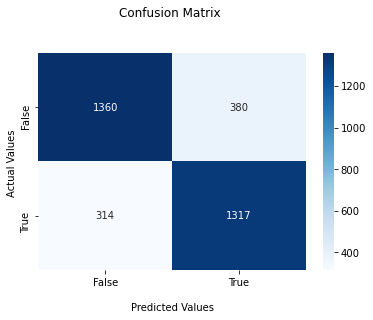

In [54]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(true_classes, predicted_classes)

ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

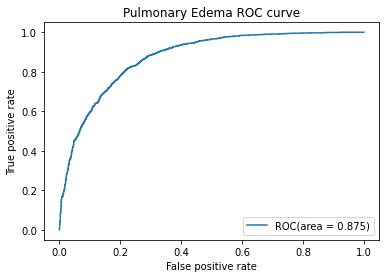

In [55]:
fpr, tpr, threshold = roc_curve(true_classes, predictions, drop_intermediate = False)
roc_auc = roc_auc_score(true_classes, predictions)

plt.figure(1)
plt.plot(fpr, tpr, label ='ROC(area = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Pulmonary Edema ROC curve')
plt.legend(loc = 'best')
plt.show()

In [56]:
model.save('Models/model_edema_52')

INFO:tensorflow:Assets written to: Models/model_edema_52/assets


/home/ssakthiv/.local/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
